In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from scipy import stats
from scipy.stats import gaussian_kde

In [2]:
single_mut = {'YAP1':[],'TEM1':[],'RRM':[]}
epi = {'YAP1':[(35,0.2612),(150,0.3163),(650,0.3444),(3000,0.3048), ('ESM1v',650,0.3484)],
       'TEM1':[(35,0.2149),(150,0.296),(650,0.3748),(3000,0.1442),('ESM1v',650,0.3828)],
       'RRM':[(35,0.2543),(150,0.2481),(650,0.2633),(3000,0.2503), ('ESM1v',650, 0.1998)]}

In [3]:
avg_params = {
    "1st": (1, 0.5565, 8.1951),
    "2nd": (1, 0.4562, 9.3169)
}
# Define logistic function
def transf(x, a, b, c):
    return -a * np.log(1 + np.exp(-b * (x + c)))

In [4]:
df = pd.read_csv('Working_Data/35/esm2_35_unique_single_mutations_YAP1.csv')
print(len(df))
df2 = pd.read_csv('Working_Data/35/20_esm2_35_unique_single_mutations_YAP1.csv')
print(len(df2))
df = df[~df['mutant_concat'].isin(df2['mutant_concat'])].reset_index(drop=True)
df

346
295


,mutant_concat,llm_single_mut,expt_single_mut
0,V11H,-4.108610,0.788732
1,F29V,-6.568663,-2.775076
2,S23A,-3.418681,0.396091
3,V11E,-3.083134,0.334339
4,P14G,-6.625213,-0.189538
5,S23W,-7.590902,0.181879
6,V11T,-2.869629,-0.037053
7,G16N,-5.692553,-0.801935
8,V11P,-2.682761,1.014976
9,M19G,-5.301608,-0.018220


In [5]:
s = df['expt_single_mut']
sllm = df['llm_single_mut']

# Apply nonlinear function with '1st' parameters to mut1 and mut2
sllmt = transf(sllm, *avg_params["1st"])

# Filter out NaNs
mask = ~np.isnan(s) & ~np.isnan(sllmt)
x_filtered = sllmt[mask]
y_filtered = s[mask]
# Compute Pearson correlation
corr, pval = stats.pearsonr(x_filtered, y_filtered)
print("Pearson correlation:", corr)
print("P-value:", pval)
#curr =single_mut['YAP1']
#curr.append((35,corr))
single_mut['YAP1'].append((35,corr)) 

Pearson correlation: 0.26312117656010814
P-value: 0.062111659470165496


In [6]:
# Compute averaged parameters for two groups
avg_params = {
    "1st": (1, 0.5166, 7.3834),
    "2nd": (1, 0.3782, 9.1546)
}

df = pd.read_csv('Working_Data/150/esm2_150_unique_single_mutations_YAP1.csv')
print(len(df))
df2 = pd.read_csv('Working_Data/150/20_esm2_150_unique_single_mutations_YAP1.csv')
print(len(df2))
df = df[~df['mutant_concat'].isin(df2['mutant_concat'])].reset_index(drop=True)
print(len(df))
s = df['expt_single_mut']
sllm = df['llm_single_mut']

# Apply nonlinear function with '1st' parameters to mut1 and mut2
sllmt = transf(sllm, *avg_params["1st"])

# Filter out NaNs
mask = ~np.isnan(s) & ~np.isnan(sllmt)
x_filtered = sllmt[mask]
y_filtered = s[mask]
# Compute Pearson correlation
corr, pval = stats.pearsonr(x_filtered, y_filtered)
print("Pearson correlation:", corr)
print("P-value:", pval)
#curr =single_mut['YAP1']
#curr.append((35,corr))
single_mut['YAP1'].append((150,corr)) 

346
295
51
Pearson correlation: 0.4846319346192675
P-value: 0.00031358324693171567


In [7]:
avg_params = {
    "1st": (1, 0.5492, 7.2232),
    "2nd": (1, 0.4354, 8.7439)
}

df = pd.read_csv('Working_Data/650/esm2_650_unique_single_mutations_YAP1.csv')
print(len(df))
df2 = pd.read_csv('Working_Data/650/20_esm2_650_unique_single_mutations_YAP1.csv')
print(len(df2))
df = df[~df['mutant_concat'].isin(df2['mutant_concat'])].reset_index(drop=True)
print(len(df))
s = df['expt_single_mut']
sllm = df['llm_single_mut']

# Apply nonlinear function with '1st' parameters to mut1 and mut2
sllmt = transf(sllm, *avg_params["1st"])

# Filter out NaNs
mask = ~np.isnan(s) & ~np.isnan(sllmt)
x_filtered = sllmt[mask]
y_filtered = s[mask]
# Compute Pearson correlation
corr, pval = stats.pearsonr(x_filtered, y_filtered)
print("Pearson correlation:", corr)
print("P-value:", pval)
#curr =single_mut['YAP1']
#curr.append((35,corr))
single_mut['YAP1'].append((650,corr)) 

346
295
51
Pearson correlation: 0.6047573828896902
P-value: 2.6002472426322772e-06


In [8]:
avg_params = {
    "1st": (1, 0.426, 7.6023),
    "2nd": (1, 0.3692, 9.4259)
}

df = pd.read_csv('Working_Data/3000/esm2_3b_unique_single_mutations_YAP1.csv')
print(len(df))
df2 = pd.read_csv('Working_Data/3000/20_esm2_3b_unique_single_mutations_YAP1.csv')
print(len(df2))
df = df[~df['mutant_concat'].isin(df2['mutant_concat'])].reset_index(drop=True)
print(len(df))
s = df['expt_single_mut']
sllm = df['llm_single_mut']

# Apply nonlinear function with '1st' parameters to mut1 and mut2
sllmt = transf(sllm, *avg_params["1st"])

# Filter out NaNs
mask = ~np.isnan(s) & ~np.isnan(sllmt)
x_filtered = sllmt[mask]
y_filtered = s[mask]
# Compute Pearson correlation
corr, pval = stats.pearsonr(x_filtered, y_filtered)
print("Pearson correlation:", corr)
print("P-value:", pval)
#curr =single_mut['YAP1']
#curr.append((35,corr))
single_mut['YAP1'].append((3000,corr)) 

346
295
51
Pearson correlation: 0.4920027042799139
P-value: 0.00024550772315494847


In [9]:
avg_params = {
    "1st": (1, 0.5565, 8.1951),
    "2nd": (1, 0.4562, 9.3169)
}

df = pd.read_csv('Working_Data/1_650/esm1_unique_single_mutations_YAP1.csv')
print(len(df))
df2 = pd.read_csv('Working_Data/1_650/20_esm1_unique_single_mutations_YAP1.csv')
print(len(df2))
df = df[~df['mutant_concat'].isin(df2['mutant_concat'])].reset_index(drop=True)
print(len(df))
s = df['expt_single_mut']
sllm = df['llm_single_mut']

# Apply nonlinear function with '1st' parameters to mut1 and mut2
sllmt = transf(sllm, *avg_params["1st"])

# Filter out NaNs
mask = ~np.isnan(s) & ~np.isnan(sllmt)
x_filtered = sllmt[mask]
y_filtered = s[mask]
# Compute Pearson correlation
corr, pval = stats.pearsonr(x_filtered, y_filtered)
print("Pearson correlation:", corr)
print("P-value:", pval)
#curr =single_mut['YAP1']
#curr.append((35,corr))
single_mut['YAP1'].append(('ESM1v',650,corr)) 

346
295
51
Pearson correlation: 0.3558000516762471
P-value: 0.01039569914987278


In [10]:
df

,mutant_concat,llm_single_mut,expt_single_mut
0,V11H,-4.360695,0.788732
1,F29V,-7.958898,-2.775076
2,S23A,-2.874210,0.396091
3,V11E,-0.854311,0.334339
4,P14G,-10.566207,-0.189538
5,S23W,-8.670868,0.181879
6,V11T,-3.097898,-0.037053
7,G16N,-6.791415,-0.801935
8,V11P,-2.384454,1.014976
9,M19G,-10.266653,-0.018220


In [11]:
avg_params = {
    "1st": (1, 0.6933, 4.1261),
    "2nd": (1, 0.4968, 2.3406)
}


df = pd.read_csv('Working_Data/35/esm2_35_unique_single_mutations_TEM1.csv')
print(len(df))
df2 = pd.read_csv('Working_Data/35/20_esm2_35_unique_single_mutations_TEM1.csv')
print(len(df2))
df = df[~df['mutant_concat'].isin(df2['mutant_concat'])].reset_index(drop=True)
print(len(df))

s = df['expt_single_mut']
sllm = df['llm_single_mut']

# Apply nonlinear function with '1st' parameters to mut1 and mut2
sllmt = transf(sllm, *avg_params["1st"])

# Filter out NaNs
mask = ~np.isnan(s) & ~np.isnan(sllmt)
x_filtered = sllmt[mask]
y_filtered = s[mask]
# Compute Pearson correlation
corr, pval = stats.pearsonr(x_filtered, y_filtered)
print("Pearson correlation:", corr)
print("P-value:", pval)
#curr =single_mut['YAP1']
#curr.append((35,corr))
single_mut['TEM1'].append((35,corr)) 

4521
2591
1930
Pearson correlation: 0.5391020951407347
P-value: 5.859723446221035e-146


In [12]:
avg_params = {
    "1st": (1, 0.6514, 5.4992),
    "2nd": (1, 0.4572, 3.4637)
}


df = pd.read_csv('Working_Data/150/esm2_150_unique_single_mutations_TEM1.csv')
print(len(df))
df2 = pd.read_csv('Working_Data/150/20_esm2_150_unique_single_mutations_TEM1.csv')
print(len(df2))
df = df[~df['mutant_concat'].isin(df2['mutant_concat'])].reset_index(drop=True)
print(len(df))

s = df['expt_single_mut']
sllm = df['llm_single_mut']

# Apply nonlinear function with '1st' parameters to mut1 and mut2
sllmt = transf(sllm, *avg_params["1st"])

# Filter out NaNs
mask = ~np.isnan(s) & ~np.isnan(sllmt)
x_filtered = sllmt[mask]
y_filtered = s[mask]
# Compute Pearson correlation
corr, pval = stats.pearsonr(x_filtered, y_filtered)
print("Pearson correlation:", corr)
print("P-value:", pval)
#curr =single_mut['YAP1']
#curr.append((35,corr))
single_mut['TEM1'].append((150,corr)) 

4521
2591
1930
Pearson correlation: 0.5910105739282894
P-value: 3.8958077803179295e-182


In [13]:
avg_params = {
    "1st": (1,0.6639, 7.2371),
    "2nd": (1, 0.4298, 4.6874)
}


df = pd.read_csv('Working_Data/650/esm2_650_unique_single_mutations_TEM1.csv')
print(len(df))
df2 = pd.read_csv('Working_Data/650/20_esm2_650_unique_single_mutations_TEM1.csv')
print(len(df2))
df = df[~df['mutant_concat'].isin(df2['mutant_concat'])].reset_index(drop=True)
print(len(df))

s = df['expt_single_mut']
sllm = df['llm_single_mut']

# Apply nonlinear function with '1st' parameters to mut1 and mut2
sllmt = transf(sllm, *avg_params["1st"])

# Filter out NaNs
mask = ~np.isnan(s) & ~np.isnan(sllmt)
x_filtered = sllmt[mask]
y_filtered = s[mask]
# Compute Pearson correlation
corr, pval = stats.pearsonr(x_filtered, y_filtered)
print("Pearson correlation:", corr)
print("P-value:", pval)
#curr =single_mut['YAP1']
#curr.append((35,corr))
single_mut['TEM1'].append((650,corr)) 

4521
2591
1930
Pearson correlation: 0.692657947465249
P-value: 6.7123848491748876e-276


In [14]:
avg_params = {
    "1st": (1,0.4213, 8.8965),
    "2nd": (1, 0.2995, 5.9639)
}


df = pd.read_csv('Working_Data/3000/esm2_3b_unique_single_mutations_TEM1.csv')
print(len(df))
df2 = pd.read_csv('Working_Data/3000/20_esm2_3b_unique_single_mutations_TEM1.csv')
print(len(df2))
df = df[~df['mutant_concat'].isin(df2['mutant_concat'])].reset_index(drop=True)
print(len(df))

s = df['expt_single_mut']
sllm = df['llm_single_mut']

# Apply nonlinear function with '1st' parameters to mut1 and mut2
sllmt = transf(sllm, *avg_params["1st"])

# Filter out NaNs
mask = ~np.isnan(s) & ~np.isnan(sllmt)
x_filtered = sllmt[mask]
y_filtered = s[mask]
# Compute Pearson correlation
corr, pval = stats.pearsonr(x_filtered, y_filtered)
print("Pearson correlation:", corr)
print("P-value:", pval)
#curr =single_mut['YAP1']
#curr.append((35,corr))
single_mut['TEM1'].append((3000,corr)) 

4521
2591
1930
Pearson correlation: 0.4597531328582272
P-value: 1.5144776427102554e-101


In [15]:
avg_params = {
    "1st": (1, 0.5305, 7.4275),
    "2nd": (1, 0.3379, 4.2474)
}


df = pd.read_csv('Working_Data/1_650/esm1_unique_single_mutations_TEM1.csv')
print(len(df))
df2 = pd.read_csv('Working_Data/1_650/20_esm1_unique_single_mutations_TEM1.csv')
print(len(df2))
df = df[~df['mutant_concat'].isin(df2['mutant_concat'])].reset_index(drop=True)
print(len(df))

s = df['expt_single_mut']
sllm = df['llm_single_mut']

# Apply nonlinear function with '1st' parameters to mut1 and mut2
sllmt = transf(sllm, *avg_params["1st"])

# Filter out NaNs
mask = ~np.isnan(s) & ~np.isnan(sllmt)
x_filtered = sllmt[mask]
y_filtered = s[mask]
# Compute Pearson correlation
corr, pval = stats.pearsonr(x_filtered, y_filtered)
print("Pearson correlation:", corr)
print("P-value:", pval)
#curr =single_mut['YAP1']
#curr.append((35,corr))
single_mut['TEM1'].append(('ESM1v',650,corr)) 

4521
2591
1930
Pearson correlation: 0.6883828129199725
P-value: 3.5830470702339915e-271


### RRM

In [16]:
df = pd.read_csv('Working_Data/35/esm2_35_unique_single_mutations_RRM_Domain.csv')
print(len(df))
df2 = pd.read_csv('Working_Data/35/20_esm2_35_unique_single_mutations_RRM_Domain.csv')
print(len(df2))
df = df[~df['mut'].isin(df2['mut'])].reset_index(drop=True)
print(len(df))

1064
837
227


In [17]:
avg_params = {
    "1st": (1,0.3872, 11.0279),
    "2nd": (1, 0.3209, 10.1318)
}


df = pd.read_csv('Working_Data/35/esm2_35_unique_single_mutations_RRM_Domain.csv')
print(len(df))
df2 = pd.read_csv('Working_Data/35/20_esm2_35_unique_single_mutations_RRM_Domain.csv')
print(len(df2))
df = df[~df['mut'].isin(df2['mut'])].reset_index(drop=True)
print(len(df))

s = df['exp_mut']
sllm = df['llm_mut']

# Apply nonlinear function with '1st' parameters to mut1 and mut2
sllmt = transf(sllm, *avg_params["1st"])

# Filter out NaNs
mask = ~np.isnan(s) & ~np.isnan(sllmt)
x_filtered = sllmt[mask]
y_filtered = s[mask]
# Compute Pearson correlation
corr, pval = stats.pearsonr(x_filtered, y_filtered)
print("Pearson correlation:", corr)
print("P-value:", pval)
#curr =single_mut['YAP1']
#curr.append((35,corr))
single_mut['RRM'].append((35,corr)) 

1064
837
227
Pearson correlation: 0.5471033349517047
P-value: 4.015617363874316e-19


In [18]:
avg_params = {
    "1st": (1,0.4051, 11.0666),
    "2nd": (1, 0.3454, 10.2324)
}


df = pd.read_csv('Working_Data/150/esm2_150_unique_single_mutations_RRM_Domain.csv')
print(len(df))
df2 = pd.read_csv('Working_Data/150/20_esm2_150_unique_single_mutations_RRM_Domain.csv')
print(len(df2))
df = df[~df['mut'].isin(df2['mut'])].reset_index(drop=True)
print(len(df))

s = df['exp_mut']
sllm = df['llm_mut']

# Apply nonlinear function with '1st' parameters to mut1 and mut2
sllmt = transf(sllm, *avg_params["1st"])

# Filter out NaNs
mask = ~np.isnan(s) & ~np.isnan(sllmt)
x_filtered = sllmt[mask]
y_filtered = s[mask]
# Compute Pearson correlation
corr, pval = stats.pearsonr(x_filtered, y_filtered)
print("Pearson correlation:", corr)
print("P-value:", pval)
#curr =single_mut['YAP1']
#curr.append((35,corr))
single_mut['RRM'].append((150,corr)) 

1064
845
219
Pearson correlation: 0.6719660790091091
P-value: 3.988875823027697e-30


In [19]:
avg_params = {
    "1st": (1,0.327, 13.0243),
    "2nd": (1, 0.2998, 11.7616)
}


df = pd.read_csv('Working_Data/650/esm2_650_unique_single_mutations_RRM_Domain.csv')
df2 = pd.read_csv('Working_Data/650/20_esm2_650_unique_single_mutations_RRM_Domain.csv')
print(len(df2))
df = df[~df['mut'].isin(df2['mut'])].reset_index(drop=True)
print(len(df))

s = df['exp_mut']
sllm = df['llm_mut']

# Apply nonlinear function with '1st' parameters to mut1 and mut2
sllmt = transf(sllm, *avg_params["1st"])

# Filter out NaNs
mask = ~np.isnan(s) & ~np.isnan(sllmt)
x_filtered = sllmt[mask]
y_filtered = s[mask]
# Compute Pearson correlation
corr, pval = stats.pearsonr(x_filtered, y_filtered)
print("Pearson correlation:", corr)
print("P-value:", pval)
#curr =single_mut['YAP1']
#curr.append((35,corr))
single_mut['RRM'].append((650,corr)) 

824
240
Pearson correlation: 0.6473271198093322
P-value: 6.81828676866881e-30


In [20]:
avg_params = {
    "1st": (1, 0.3299, 12.9564),
    "2nd": (1, 0.2892, 11.6744)
}


df = pd.read_csv('Working_Data/3000/esm2_3b_unique_single_mutations_RRM_Domain.csv')
df2 = pd.read_csv('Working_Data/3000/20_esm2_3b_unique_single_mutations_RRM_Domain.csv')
print(len(df2))
df = df[~df['mut'].isin(df2['mut'])].reset_index(drop=True)
print(len(df))
s = df['exp_mut']
sllm = df['llm_mut']

# Apply nonlinear function with '1st' parameters to mut1 and mut2
sllmt = transf(sllm, *avg_params["1st"])

# Filter out NaNs
mask = ~np.isnan(s) & ~np.isnan(sllmt)
x_filtered = sllmt[mask]
y_filtered = s[mask]
# Compute Pearson correlation
corr, pval = stats.pearsonr(x_filtered, y_filtered)
print("Pearson correlation:", corr)
print("P-value:", pval)
#curr =single_mut['YAP1']
#curr.append((35,corr))
single_mut['RRM'].append((3000,corr)) 

838
226
Pearson correlation: 0.6857523430727722
P-value: 9.624922357572087e-33


In [21]:
avg_params = {
    "1st": (1, 0.2817, 14.0424),
    "2nd": (1, 0.2713, 12.5865)
}


df = pd.read_csv('Working_Data/1_650/esm1_unique_single_mutations_RRM_Domain.csv')
df2 = pd.read_csv('Working_Data/1_650/20_esm1_unique_single_mutations_RRM_Domain.csv')
print(len(df2))
df = df[~df['mut'].isin(df2['mut'])].reset_index(drop=True)
print(len(df))

s = df['exp_mut']
sllm = df['llm_mut']

# Apply nonlinear function with '1st' parameters to mut1 and mut2
sllmt = transf(sllm, *avg_params["1st"])

# Filter out NaNs
mask = ~np.isnan(s) & ~np.isnan(sllmt)
x_filtered = sllmt[mask]
y_filtered = s[mask]
# Compute Pearson correlation
corr, pval = stats.pearsonr(x_filtered, y_filtered)
print("Pearson correlation:", corr)
print("P-value:", pval)
#curr =single_mut['YAP1']
#curr.append((35,corr))
single_mut['RRM'].append(('ESM1v',650,corr)) 

840
224
Pearson correlation: 0.5255976929672632
P-value: 2.6110632374114573e-17


In [22]:
single_mut

{'YAP1': [(35, 0.26312117656010814),
  (150, 0.4846319346192675),
  (650, 0.6047573828896902),
  (3000, 0.4920027042799139),
  ('ESM1v', 650, 0.3558000516762471)],
 'TEM1': [(35, 0.5391020951407347),
  (150, 0.5910105739282894),
  (650, 0.692657947465249),
  (3000, 0.4597531328582272),
  ('ESM1v', 650, 0.6883828129199725)],
 'RRM': [(35, 0.5471033349517047),
  (150, 0.6719660790091091),
  (650, 0.6473271198093322),
  (3000, 0.6857523430727722),
  ('ESM1v', 650, 0.5255976929672632)]}

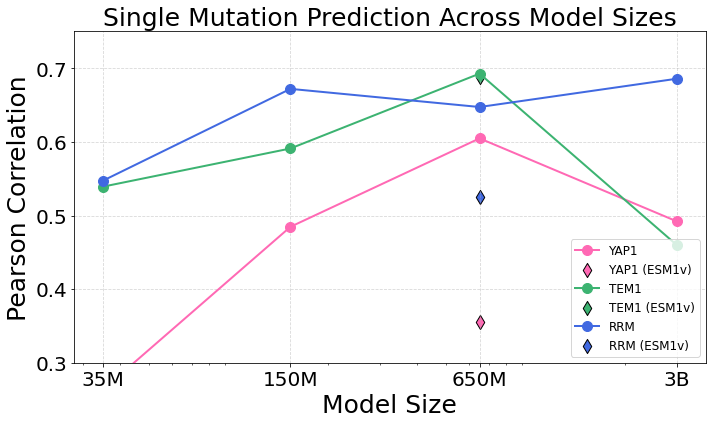

In [23]:
# Define colors
colors = {
    'YAP1': 'hotpink',
    'TEM1': 'mediumseagreen',
    'RRM': 'royalblue'
}

fig, ax = plt.subplots(figsize=(10, 6))

# Store legend handles to deduplicate later
legend_handles = []
legend_labels = []

for protein in single_mut:
    esm2_sizes = []
    esm2_scores = []
    esm1v_size = None
    esm1v_score = None

    for entry in single_mut[protein]:
        if entry[0] == 'ESM1v':
            esm1v_size = entry[1]
            esm1v_score = entry[2]
        else:
            esm2_sizes.append(entry[0])
            esm2_scores.append(entry[1])

    # Plot ESM2 line
    line = ax.plot(esm2_sizes, esm2_scores, label=protein,
                   marker='o', color=colors[protein], linewidth=2,ms=10)
    legend_handles.append(line[0])
    legend_labels.append(protein)

    # Plot ESM1v star
    star = ax.scatter(esm1v_size, esm1v_score, marker='d', s=100,
                      color=colors[protein], edgecolor='black',
                      label=f'{protein} (ESM1v)')
    legend_handles.append(star)
    legend_labels.append(f'{protein} (ESM1v)')

# Formatting
ax.set_xscale('log')
ax.set_xticks([35, 150, 650, 3000], fontsize=20)
ax.set_xticklabels(['35M', '150M', '650M', '3B'], fontsize=20)
ax.set_xlabel("Model Size", fontsize=25)
ax.set_ylabel("Pearson Correlation", fontsize=25)
ax.set_title("Single Mutation Prediction Across Model Sizes", fontsize=25)
ax.tick_params(axis='both', labelsize=20)
ax.grid(True, linestyle='--', alpha=0.5)

# Set y-axis range
ax.set_ylim(0.3, 0.75)

# Remove duplicate labels if any
unique_labels = dict(zip(legend_labels, legend_handles))
ax.legend(unique_labels.values(), unique_labels.keys(), fontsize=12, loc='lower right')

plt.tight_layout()
plt.savefig('sizes_single_v2.png',dpi=300)
plt.show()

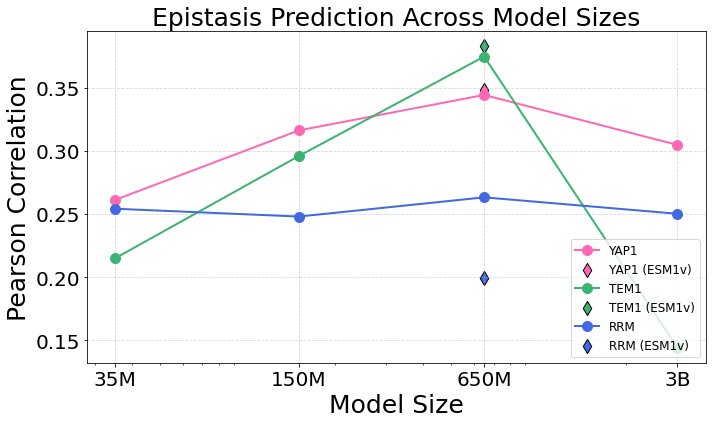

In [24]:
# Define colors
colors = {
    'YAP1': 'hotpink',
    'TEM1': 'mediumseagreen',
    'RRM': 'royalblue'
}

fig, ax = plt.subplots(figsize=(10, 6))

# Store legend handles to deduplicate later
legend_handles = []
legend_labels = []

for protein in epi:
    esm2_sizes = []
    esm2_scores = []
    esm1v_size = None
    esm1v_score = None

    for entry in epi[protein]:
        if entry[0] == 'ESM1v':
            esm1v_size = entry[1]
            esm1v_score = entry[2]
        else:
            esm2_sizes.append(entry[0])
            esm2_scores.append(entry[1])

    # Plot ESM2 line
    line = ax.plot(esm2_sizes, esm2_scores, label=protein,
                   marker='o', color=colors[protein], linewidth=2, ms=10)
    legend_handles.append(line[0])
    legend_labels.append(protein)

    # Plot ESM1v star
    star = ax.scatter(esm1v_size, esm1v_score, marker='d', s=100,
                      color=colors[protein], edgecolor='black',
                      label=f'{protein} (ESM1v)')
    legend_handles.append(star)
    legend_labels.append(f'{protein} (ESM1v)')

# Formatting
ax.set_xscale('log')
ax.set_xticks([35, 150, 650, 3000], fontsize=20)
ax.set_xticklabels(['35M', '150M', '650M', '3B'], fontsize=20)
ax.set_xlabel("Model Size", fontsize=25)
ax.set_ylabel("Pearson Correlation", fontsize=25)
ax.set_title("Epistasis Prediction Across Model Sizes", fontsize=25)
ax.tick_params(axis='both', labelsize=20)
ax.grid(True, linestyle='--', alpha=0.5)

# Set y-axis range
#ax.set_ylim(0.3, 0.75)

# Remove duplicate labels if any
unique_labels = dict(zip(legend_labels, legend_handles))
ax.legend(unique_labels.values(), unique_labels.keys(), fontsize=12, loc='lower right')

plt.tight_layout()
plt.savefig('sizes_epi_v1.png',dpi=300)
plt.show()